In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

%matplotlib inline

In [2]:
covariates = pd.read_csv('/Users/joelporcaro/Metis/project5/data/dengue_features_train.csv')
labels = pd.read_csv('/Users/joelporcaro/Metis/project5/data/dengue_labels_train.csv')

In [3]:
# figure out what to do with ndvi_ne missing values
# tdtr = diurnal temperature range



In [4]:
def sj_condition(s):
    if s['total_cases'] > 20:
        return 1
    else:
        return 0

def iq_condition(s):
    if s['total_cases'] > 15:
        return 1
    else:
        return 0
    
def cleaner(covariates_path, labels_path):
    
    df = pd.merge(labels_path, covariates_path)
    
    sj_df = df.loc[df.city == 'sj']
    iq_df = df.loc[df.city == 'iq']

    sj_df['outbreak'] = sj_df.apply(sj_condition, axis=1)
    iq_df['outbreak'] = iq_df.apply(iq_condition, axis=1)
    
    sj_cols = sj_df.columns.tolist()
    sj_cols = sj_cols[-1:] + sj_cols[:-1]
    sj_df = sj_df[sj_cols]
    
    iq_cols = iq_df.columns.tolist()
    iq_cols = iq_cols[-1:] + iq_cols[:-1]
    iq_df = iq_df[iq_cols]
    
    sj_df.interpolate(inplace=True)
    iq_df.interpolate(inplace=True)
    
    sj_df['week_start_date'] = pd.to_datetime(sj_df['week_start_date'])
    iq_df['week_start_date'] = pd.to_datetime(iq_df['week_start_date'])
    
    iq_df = iq_df.drop(iq_df.index[:72])
    
    return sj_df, iq_df

In [14]:
sj_df, iq_df = cleaner(covariates_path=covariates, labels_path=labels)

/Users/joelporcaro/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/joelporcaro/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [7]:
for i in iq_df.total_cases

outbreak city  year  weekofyear  total_cases week_start_date   ndvi_ne  \
936          0   iq  2000          26            0      2000-07-01  0.192886   
937          0   iq  2000          27            0      2000-07-08  0.216833   
938          0   iq  2000          28            0      2000-07-15  0.176757   
939          0   iq  2000          29            0      2000-07-22  0.227729   
940          0   iq  2000          30            0      2000-07-29  0.328643   
941          0   iq  2000          31            0      2000-08-05  0.205529   
942          0   iq  2000          32            0      2000-08-12  0.312486   
943          0   iq  2000          33            0      2000-08-19  0.384133   
944          0   iq  2000          34            0      2000-08-26  0.408157   
945          0   iq  2000          35            0      2000-09-02  0.332043   
946          0   iq  2000          36            1      2000-09-09  0.295586   
947          0   iq  2000          37            0      2000-09-16  0.284657   
948          0   iq  2000          38            0      2000-09-23  0.348814   
949          0   iq  2000          39            0      2000-09-30  0.175686   
950          0   iq  2000          40            0      2000-10-07  0.337540   
951          0   iq  2000          41            1      2000-10-14  0.223533   
952          0   iq  2000          42            1      2000-10-21  0.274800   
953          0   iq  2000          43            0      2000-10-28  0.367300   
954          0   iq  2000          44            0      2000-11-04  0.295100   
955          0   iq  2000          45            0      2000-11-11  0.271367   
956          0   iq  2000          46            0      2000-11-18  0.099933   
957          0   iq  2000          47            0      2000-11-25  0.169983   
958          0   iq  2000          48            0      2000-12-02  0.251971   
959          0   iq  2000          49            0      2000-12-09  0.165833   
960          0   iq  2000          50            1      2000-12-16  0.338786   
961          0   iq  2000          51            0      2000-12-23  0.265014   
962          0   iq  2001           1            0      2001-01-01  0.254714   
963          0   iq  2001           2            0      2001-01-08  0.302133   
964          0   iq  2001           3            0      2001-01-15  0.174757   
965          0   iq  2001           4            0      2001-01-22  0.237600   
...        ...  ...   ...         ...          ...             ...       ...   
1426         0   iq  2009          49            4      2009-12-03  0.348529   
1427         0   iq  2009          50            4      2009-12-10  0.192200   
1428         0   iq  2009          51            1      2009-12-17  0.217600   
1429         0   iq  2009          52            0      2009-12-24  0.210422   
1430         0   iq  2010          53            0      2010-01-01  0.167497   
1431         0   iq  2010           1           10      2010-01-08  0.124571   
1432         0   iq  2010           2            9      2010-01-15  0.145286   
1433         1   iq  2010           3           17      2010-01-22  0.252114   
1434         1   iq  2010           4           16      2010-01-29  0.263271   
1435         0   iq  2010           5           11      2010-02-05  0.170100   
1436         0   iq  2010           6           12      2010-02-12  0.230757   
1437         1   iq  2010           7           19      2010-02-19  0.293300   
1438         0   iq  2010           8           15      2010-02-26  0.303657   
1439         0   iq  2010           9           12      2010-03-05  0.127317   
1440         0   iq  2010          10           12      2010-03-12  0.311729   
1441         1   iq  2010          11           16      2010-03-19  0.294600   
1442         0   iq  2010          12            9      2010-03-26  0.266286   
1443         0   iq  2010          13            4      2010-04-02  0.141433   
1444  

In [30]:
sj_df_prophet = pd.DataFrame({'ds': sj_df.week_start_date, 'y': sj_df.total_cases})
sj_df_prophet

ds    y
0   1990-04-30    4
1   1990-05-07    5
2   1990-05-14    4
3   1990-05-21    3
4   1990-05-28    6
5   1990-06-04    2
6   1990-06-11    4
7   1990-06-18    5
8   1990-06-25   10
9   1990-07-02    6
10  1990-07-09    8
11  1990-07-16    2
12  1990-07-23    6
13  1990-07-30   17
14  1990-08-06   23
15  1990-08-13   13
16  1990-08-20   21
17  1990-08-27   28
18  1990-09-03   24
19  1990-09-10   20
20  1990-09-17   40
21  1990-09-24   27
22  1990-10-01   42
23  1990-10-08   33
24  1990-10-15   43
25  1990-10-22   37
26  1990-10-29   57
27  1990-11-05   71
28  1990-11-12   44
29  1990-11-19   56
..         ...  ...
906 2007-10-01  170
907 2007-10-08  135
908 2007-10-15  106
909 2007-10-22   68
910 2007-10-29   48
911 2007-11-05   48
912 2007-11-12   26
913 2007-11-19   33
914 2007-11-26   29
915 2007-12-03   17
916 2007-12-10   12
917 2007-12-17   13
918 2007-12-24   17
919 2008-01-01   15
920 2008-01-08   14
921 2008-01-15   15
922 2008-01-22   10
923 2008-01-29    9
924 2008-02-05    2
925 2008-02-12    6
926 2008-02-19    8
927 2008-02-26    5
928 2008-03-04    1
929 2008-03-11    2
930 2008-03-18    3
931 2008-03-25    4
932 2008-04-01    3
933 2008-04-08    1
934 2008-04-15    3
935 2008-04-22    5

[936 rows x 2 columns]

In [31]:
model = Prophet()
model.fit(sj_df_prophet)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


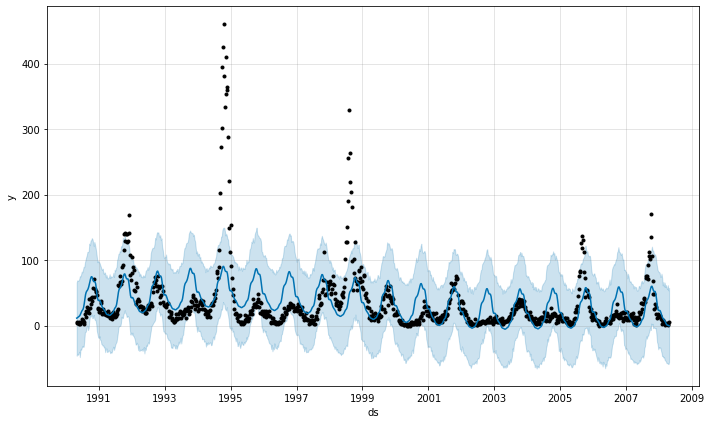

In [36]:
future = model.make_future_dataframe(periods=0)
forecast = model.predict(future)
fig1 = model.plot(forecast)

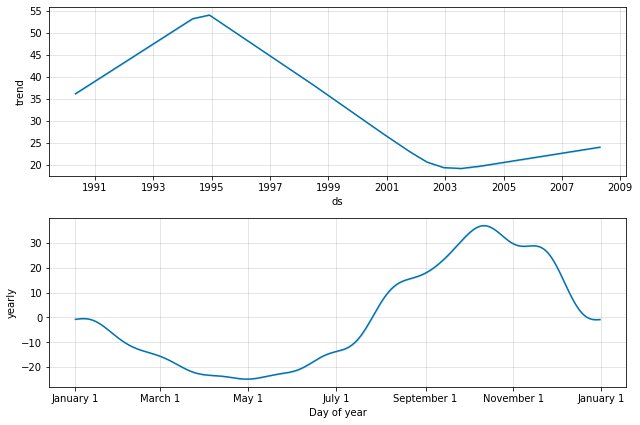

In [39]:
fig2 = model.plot_components(forecast)

In [55]:
fig2.get_data()

AttributeError: 'Figure' object has no attribute 'get_data'

In [6]:
covariates.head()

city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.177617                 12.42             297.572857  ...   
1  0.155486                 22.82             298.211429  ...   
2  0.170843                 34.54             298.781429  ...   
3  0.235886                 15.36             298.987143  ...   
4  0.247340                  7.52             299.518571  ...   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1                            17.94                             77.368571   
2                            26.10                             82.052857   
3                            13.90                             80.337143   
4                            12.20                             80.460000   

   reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                         12.42                              14.012857   
1                         22.82                              15.372857   
2                         34.54                              16.848571   
3                         15.36                              16.672857   
4                          7.52                              17.210000   

   reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0           2.628571           25.442857                 6.900000   
1           2.371429           26.714286                 6.371429   
2           2.300000           26.714286                 6.485714   
3           2.428571           27.471429                 6.771429   
4           3.014286           28.942857                 9.371429   

   station_max_temp_c  station_min_temp_c  station_precip_mm  
0                29.4                20.0               16.0  
1                31.7                22.2                8.6  
2                32.2                22.8               41.4  
3                33.3                23.3                4.0  
4                35.0                23.9                5.8  

[5 rows x 24 columns]

In [7]:
labels.head()

city  year  weekofyear  total_cases
0   sj  1990          18            4
1   sj  1990          19            5
2   sj  1990          20            4
3   sj  1990          21            3
4   sj  1990          22            6

In [9]:
print(len(covariates))
print(len(labels))

1456
1456


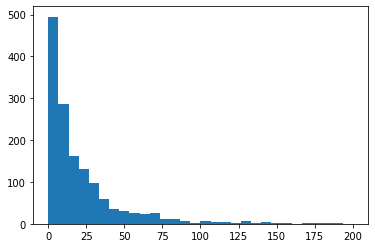

In [76]:
plt.hist(data.total_cases, bins=30, range=[0, 200])
plt.show()

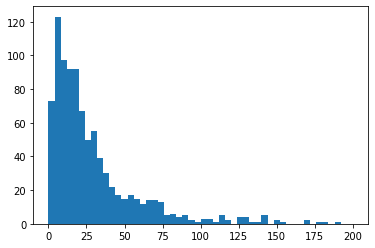

In [53]:
plt.hist(sj_data.total_cases, bins=50, range=[0, 200])
plt.show()

In [47]:
sj_data = data.loc[data.city == 'sj']
iq_data = data.loc[data.city == 'iq']

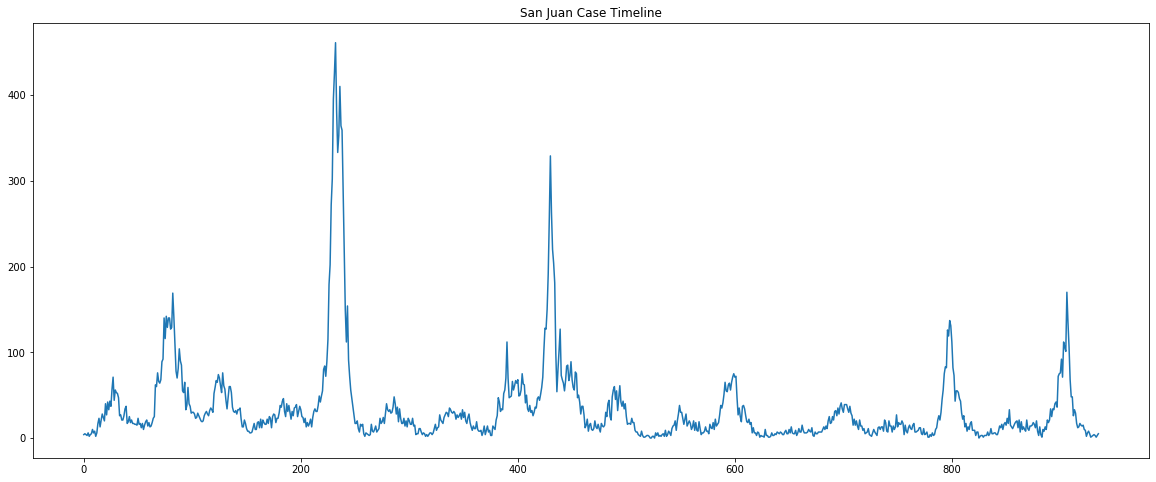

In [49]:
plt.figure(figsize=(20, 8))
plt.plot(sj_data.total_cases)
plt.title("San Juan Case Timeline")
plt.show()

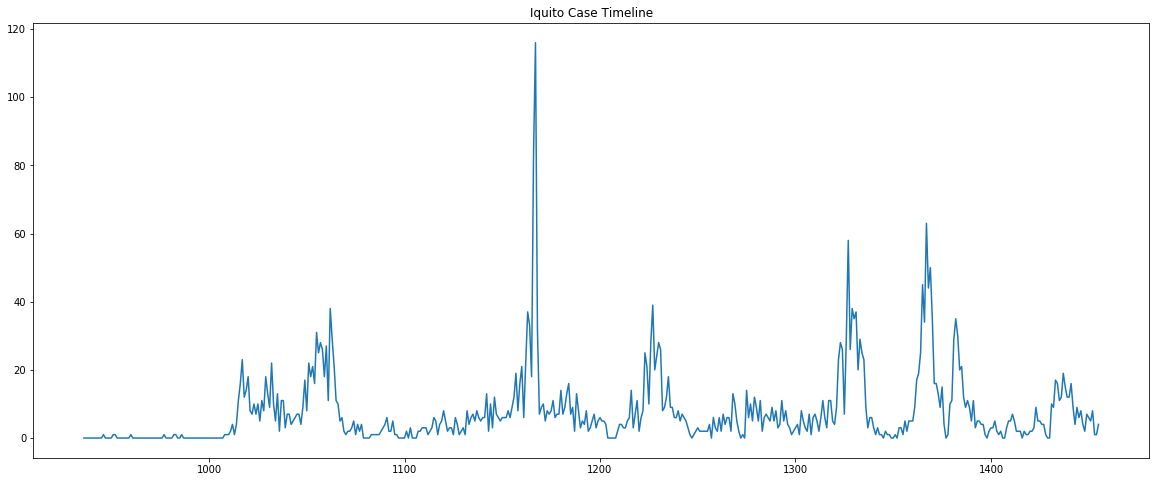

In [50]:
plt.figure(figsize=(20, 8))
plt.plot(iq_data.total_cases)
plt.title("Iquito Case Timeline")
plt.show()

In [52]:
# san juan outbreak threshold appears to be ~ 30
# for iquito probably ~ 15

In [36]:
sj_data.describe()

year  weekofyear  total_cases     ndvi_ne     ndvi_nw  \
count   936.000000  936.000000   936.000000  745.000000  887.000000   
mean   1998.826923   26.503205    34.180556    0.057925    0.067469   
std       5.212076   15.021909    51.381372    0.107153    0.092479   
min    1990.000000    1.000000     0.000000   -0.406250   -0.456100   
25%    1994.000000   13.750000     9.000000    0.004500    0.016425   
50%    1999.000000   26.500000    19.000000    0.057700    0.068075   
75%    2003.000000   39.250000    37.000000    0.111100    0.115200   
max    2008.000000   53.000000   461.000000    0.493400    0.437100   

          ndvi_se     ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
count  917.000000  917.000000            927.000000             930.000000   
mean     0.177655    0.165956             35.470809             299.163653   
std      0.057166    0.056073             44.606137               1.236429   
min     -0.015533   -0.063457              0.000000             295.938571   
25%      0.139283    0.129157              0.000000             298.195000   
50%      0.177186    0.165971             20.800000             299.254286   
75%      0.212557    0.202771             52.180000             300.132857   
max      0.393129    0.381420            390.600000             302.200000   

       reanalysis_avg_temp_k  ...  reanalysis_precip_amt_kg_per_m2  \
count             930.000000  ...                       930.000000   
mean              299.276920  ...                        30.465419   
std                 1.218637  ...                        35.628055   
min               296.114286  ...                         0.000000   
25%               298.300000  ...                        10.825000   
50%               299.378571  ...                        21.300000   
75%               300.228571  ...                        37.000000   
max               302.164286  ...                       570.500000   

       reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
count                            930.000000                    927.000000   
mean                              78.568181                     35.470809   
std                                3.389488                     44.606137   
min                               66.735714                      0.000000   
25%                               76.246071                      0.000000   
50%                               78.667857                     20.800000   
75%                               80.963214                     52.180000   
max                               87.575714                    390.600000   

       reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
count                             930.000000         930.000000   
mean                               16.552409           2.516267   
std                                 1.560923           0.498892   
min                                11.715714           1.357143   
25%                                15.236429           2.157143   
50%                                16.845714           2.457143   
75%                                17.858571           2.800000   
max                                19.440000           4.428571   

       station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
count          930.000000               930.000000          930.000000   
mean            27.006528                 6.757373           31.607957   
std              1.415473                 0.835993            1.717297   
min             22.842857                 4.528571           26.700000   
25%             25.842857                 6.200000           30.600000   
50%             27.228571                 6.757143           31.700000   
75%             28.185714                 7.285714           32.800000   
max             30.071429                 9.914286           35.600000   

       station_min_temp_c  station_precip_mm  
count          930.000000   

In [48]:
iq_data.describe()

year  weekofyear  total_cases     ndvi_ne     ndvi_nw  \
count   520.000000  520.000000   520.000000  517.000000  517.000000   
mean   2005.000000   26.503846     7.565385    0.263869    0.238783   
std       2.918283   15.029450    10.765478    0.081370    0.076751   
min    2000.000000    1.000000     0.000000    0.061729    0.035860   
25%    2002.750000   13.750000     1.000000    0.200000    0.179540   
50%    2005.000000   26.500000     5.000000    0.263643    0.232971   
75%    2007.250000   39.250000     9.000000    0.319971    0.293929   
max    2010.000000   53.000000   116.000000    0.508357    0.454429   

          ndvi_se     ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
count  517.000000  517.000000            516.000000             516.000000   
mean     0.250126    0.266779             64.245736             297.869538   
std      0.077354    0.086345             35.218995               1.170997   
min      0.029880    0.064183              0.000000             294.635714   
25%      0.194743    0.204129             39.105000             297.092500   
50%      0.249800    0.262143             60.470000             297.822857   
75%      0.302300    0.325150             85.757500             298.649286   
max      0.538314    0.546017            210.830000             301.637143   

       reanalysis_avg_temp_k  ...  reanalysis_precip_amt_kg_per_m2  \
count             516.000000  ...                       516.000000   
mean              299.133043  ...                        57.609864   
std                 1.332073  ...                        50.286555   
min               294.892857  ...                         0.000000   
25%               298.221429  ...                        24.065000   
50%               299.121429  ...                        46.440000   
75%               300.123214  ...                        71.072500   
max               302.928571  ...                       362.030000   

       reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
count                            516.000000                    516.000000   
mean                              88.639117                     64.245736   
std                                7.583889                     35.218995   
min                               57.787143                      0.000000   
25%                               84.295000                     39.105000   
50%                               90.917143                     60.470000   
75%                               94.563929                     85.757500   
max                               98.610000                    210.830000   

       reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
count                             516.000000         516.000000   
mean                               17.096110           9.206783   
std                                 1.445769           2.448525   
min                                12.111429           3.714286   
25%                                16.102857           7.371429   
50%                                17.428571           8.964286   
75%                                18.180357          11.014286   
max                                20.461429          16.028571   

       station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
count          483.000000               483.000000          506.000000   
mean            27.530933                10.566197           34.004545   
std              0.921769                 1.535496            1.325261   
min             21.400000                 5.200000           30.100000   
25%             27.000000                 9.500000           33.200000   
50%             27.600000                10.625000           34.000000   
75%             28.100000                11.655000           34.900000   
max             30.800000                15.800000           42.200000   

       station_min_temp_c  station_precip_mm  
count          512.000000   

/Users/joelporcaro/anaconda3/envs/metis/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/joelporcaro/anaconda3/envs/metis/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


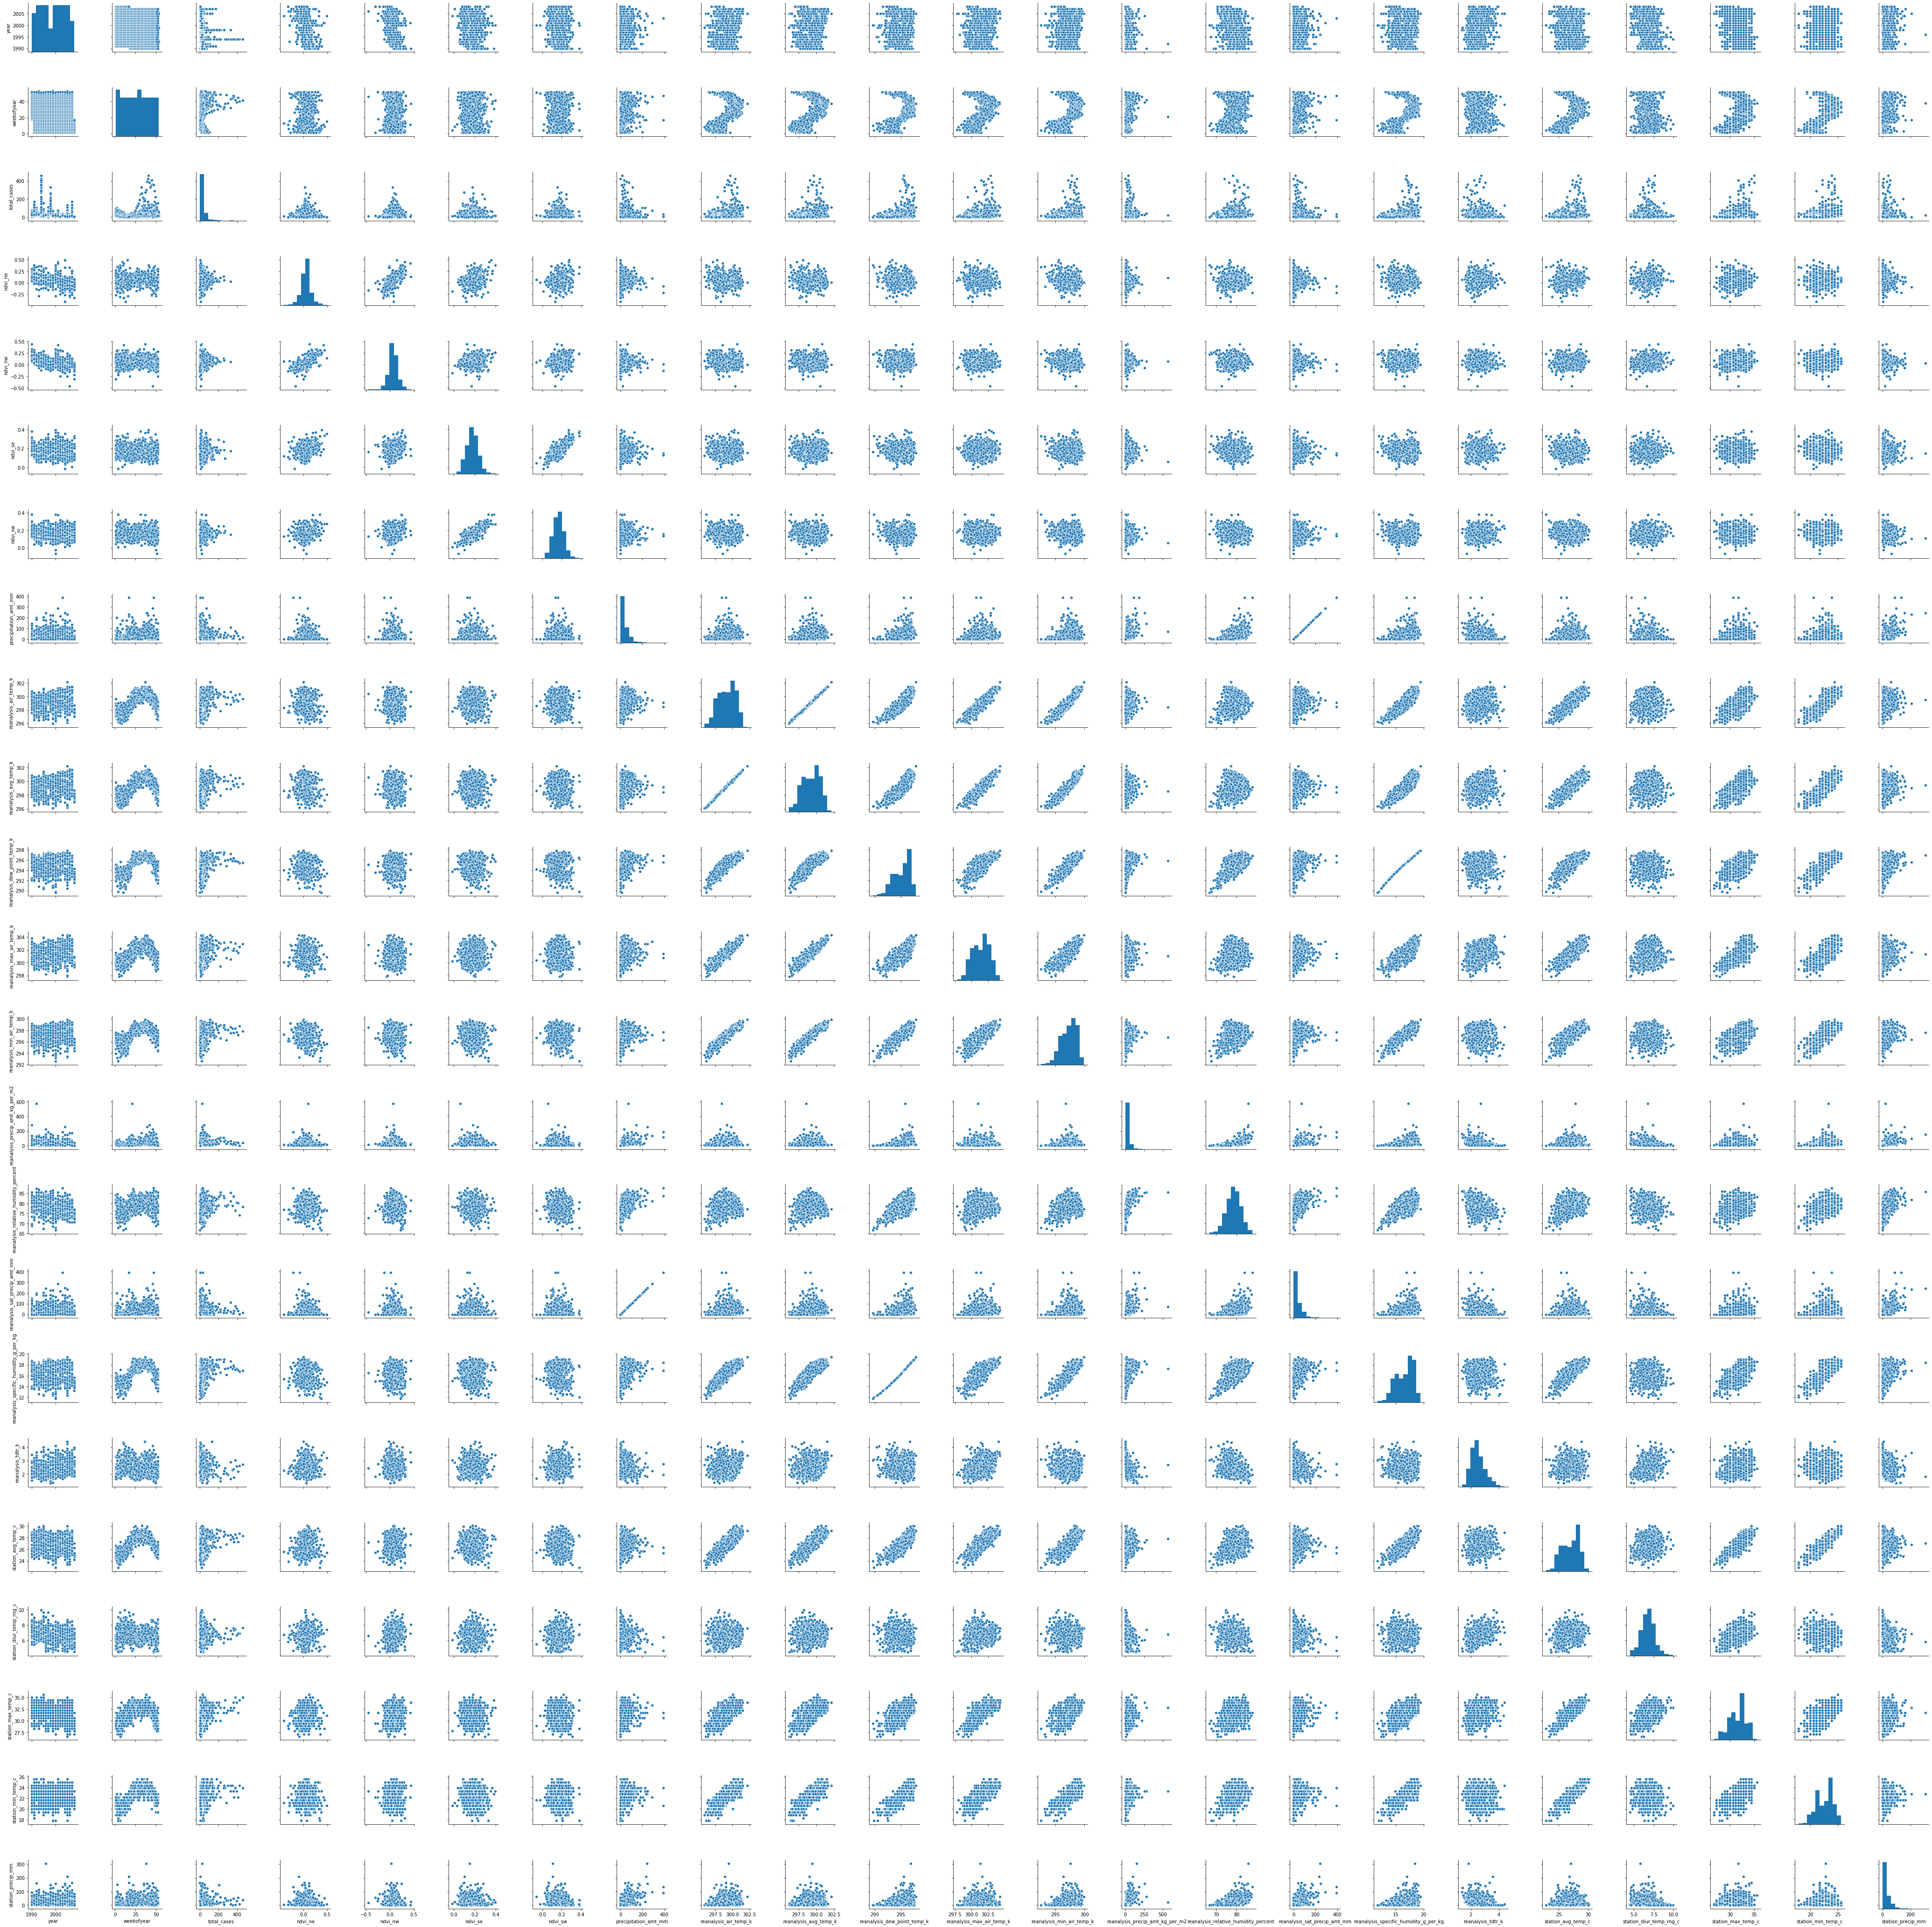

In [58]:
sns.pairplot(sj_data)

/Users/joelporcaro/anaconda3/envs/metis/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/joelporcaro/anaconda3/envs/metis/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


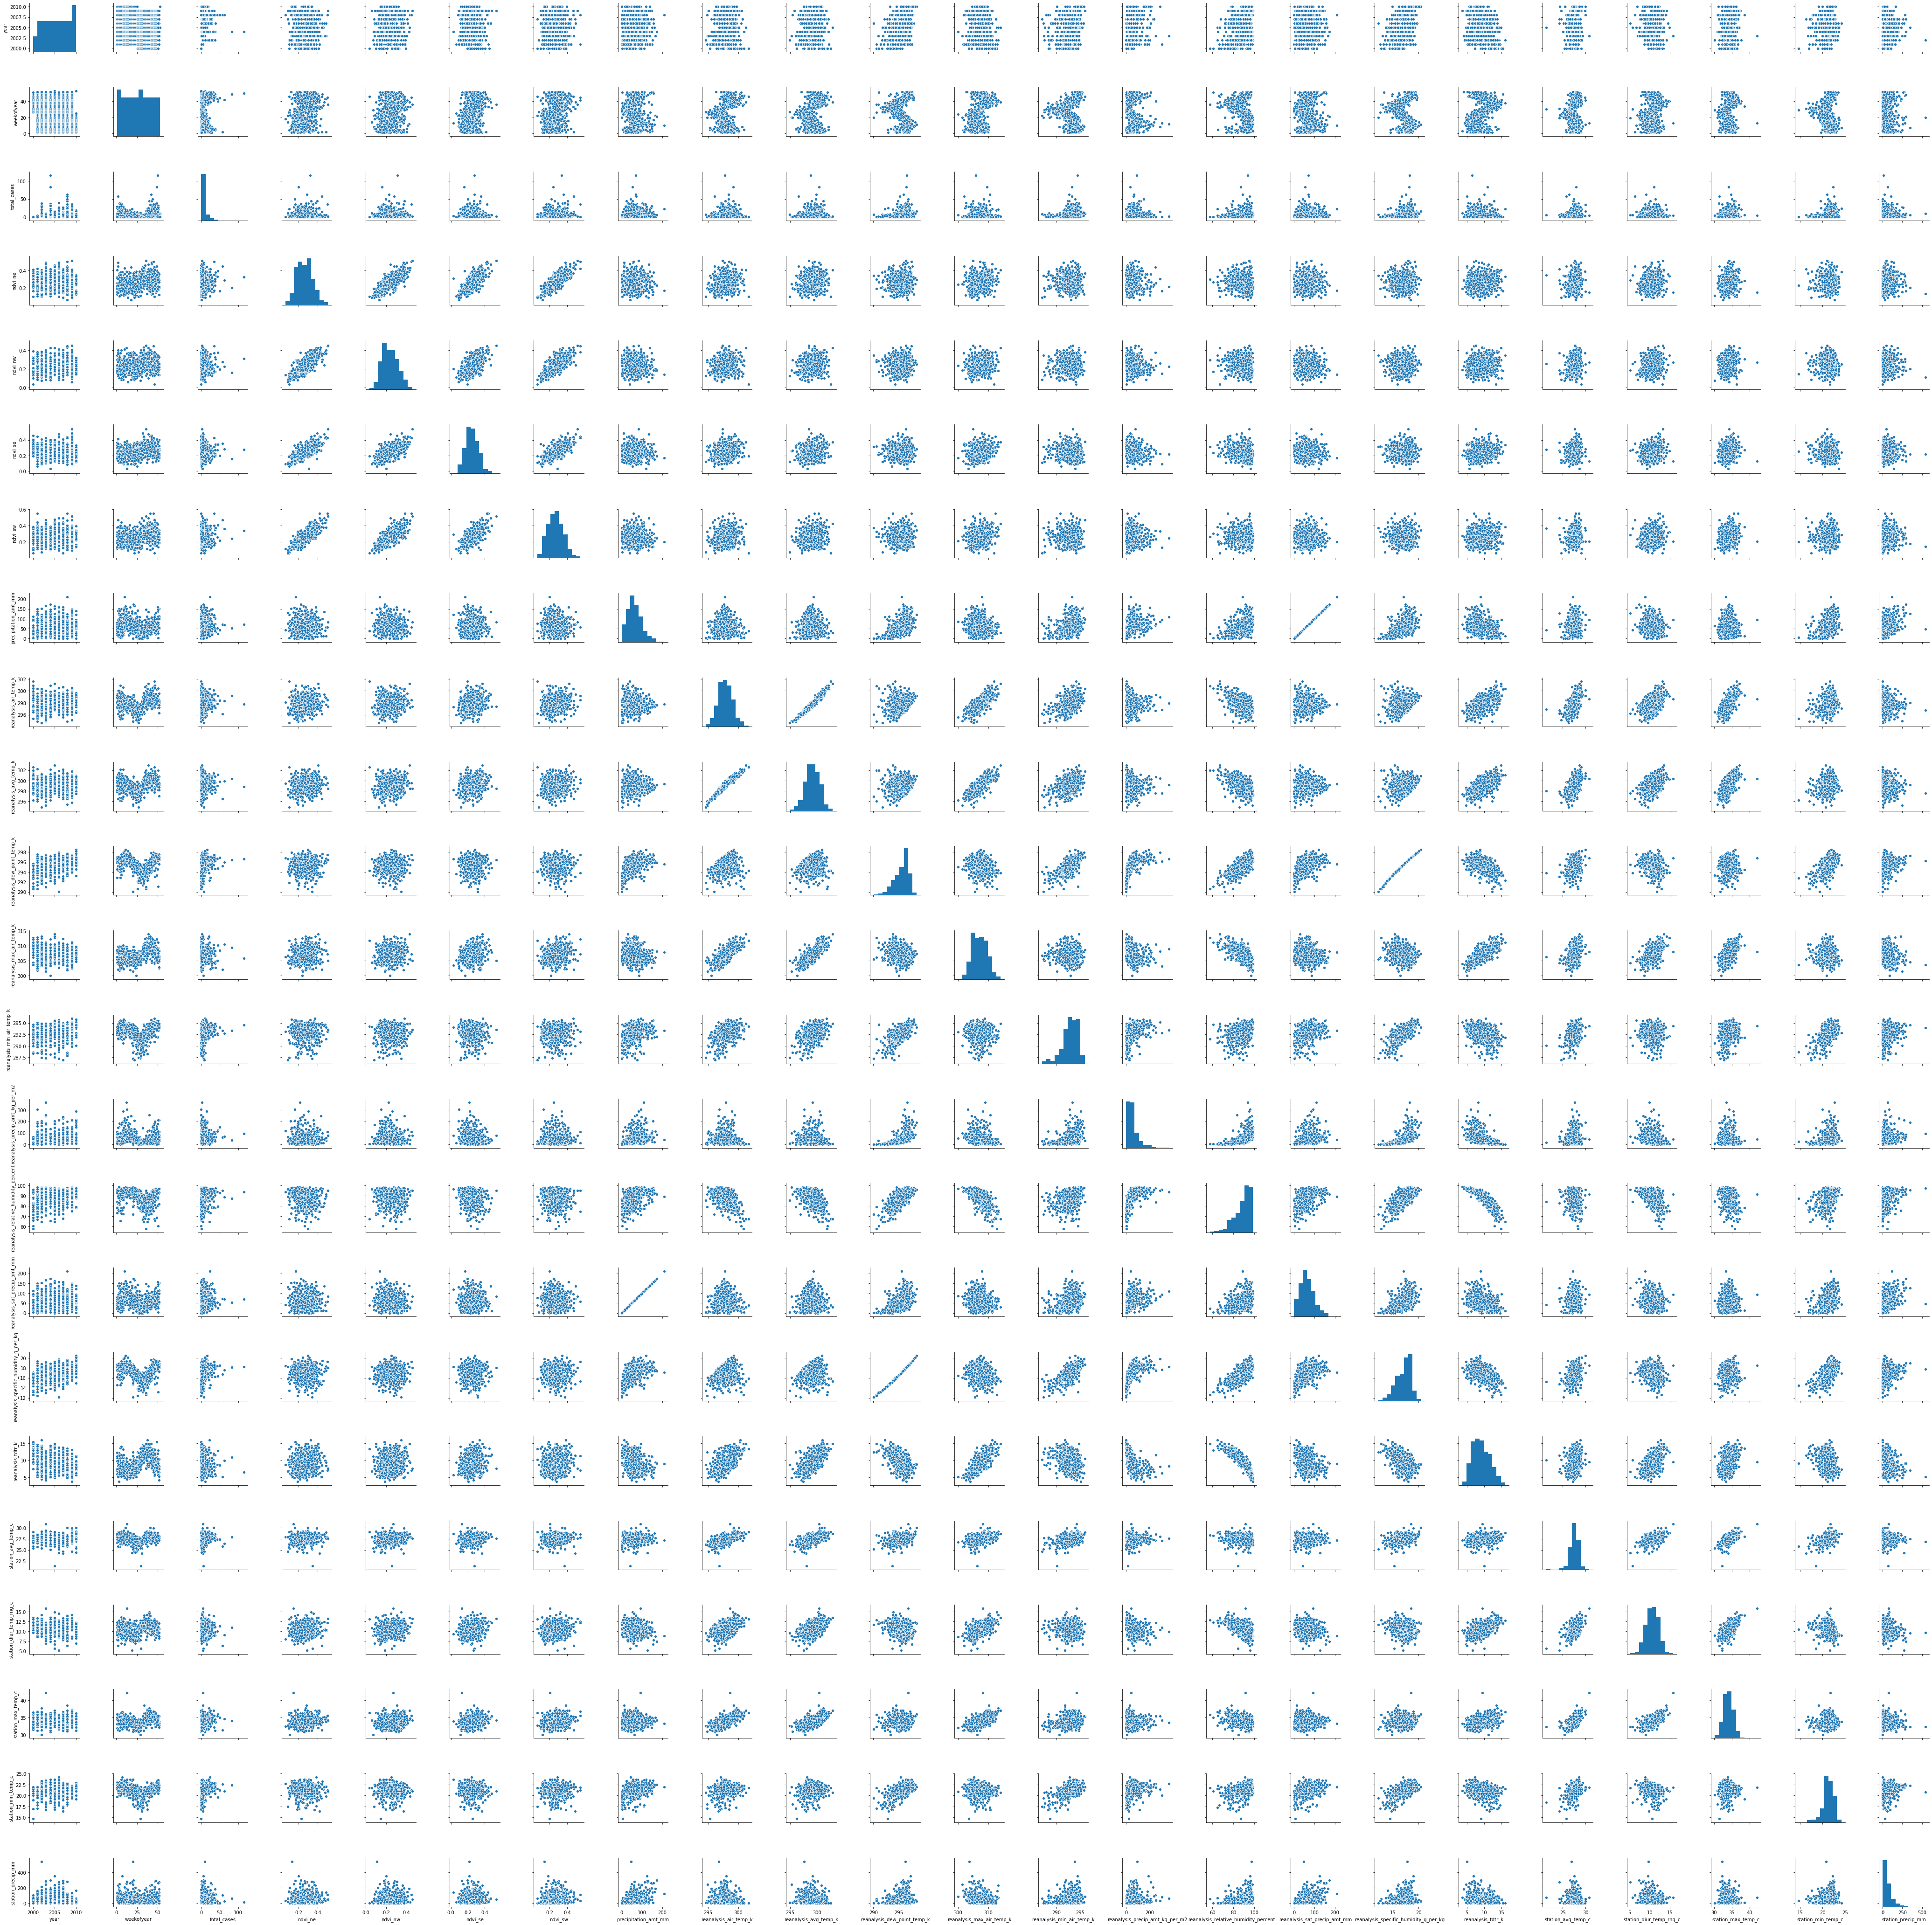

In [59]:
sns.pairplot(iq_data)

In [66]:
def conditions(s):
    if s['total_cases'] > 15:
        return 1
    else:
        return 0

In [61]:
sj_data['outbreak'] = sj_data.apply(conditions, axis=1)

/Users/joelporcaro/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
iq_data['outbreak'] = iq_data.apply(conditions, axis=1)

/Users/joelporcaro/anaconda3/envs/metis/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [89]:
sj_cols = sj_data.columns.tolist()
sj_cols

['city',
 'year',
 'weekofyear',
 'total_cases',
 'week_start_date',
 'ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm',
 'outbreak']

In [90]:
sj_cols = sj_cols[-1:] + sj_cols[:-1]

In [91]:
sj_cols

['outbreak',
 'city',
 'year',
 'weekofyear',
 'total_cases',
 'week_start_date',
 'ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm']

In [93]:
sj_cols = sj_cols[-1:] + sj_cols[:-1]
sj_data = sj_data[sj_cols]

In [96]:
iq_cols = iq_data.columns.tolist()
iq_cols

['city',
 'year',
 'weekofyear',
 'total_cases',
 'week_start_date',
 'ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm',
 'outbreak']

In [97]:
iq_cols = iq_cols[-1:] + iq_cols[:-1]

In [99]:
iq_data = iq_data[iq_cols]

In [110]:
sj_data.isnull().sum()

outbreak                                   0
city                                       0
year                                       0
weekofyear                                 0
total_cases                                0
week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_di

In [185]:
sj_data

0      0.122600
1      0.169900
2      0.032250
3      0.128633
4      0.196200
5      0.178232
6      0.112900
7      0.072500
8      0.102450
9      0.178232
10     0.192875
11     0.291600
12     0.150567
13     0.178232
14     0.178232
15     0.178232
16     0.190233
17     0.252900
18     0.235400
19     0.127967
20     0.196350
21     0.116100
22     0.228550
23     0.171150
24     0.178232
25     0.146200
26     0.252250
27     0.152600
28     0.290800
29     0.272200
         ...   
906    0.096000
907    0.009000
908    0.021000
909    0.021992
910    0.124300
911   -0.251700
912   -0.058900
913    0.021992
914   -0.059500
915    0.021992
916   -0.133050
917    0.021992
918    0.014800
919    0.000600
920   -0.055423
921   -0.055423
922   -0.026800
923   -0.055423
924   -0.111700
925    0.072000
926   -0.138650
927   -0.055423
928   -0.088900
929   -0.321400
930    0.044900
931    0.077850
932   -0.038000
933   -0.155200
934    0.001800
935   -0.037000
Name: ndvi_ne, Length: 9

In [151]:
sj_year_means = sj_data.groupby('year').mean()

In [154]:
sj_year_means

outbreak  weekofyear  total_cases   ndvi_ne   ndvi_nw   ndvi_se  \
year                                                                    
1990  0.342857   35.000000    24.742857  0.178232  0.184791  0.206748   
1991  0.442308   26.500000    53.865385  0.118390  0.149195  0.172003   
1992  0.673077   26.500000    45.596154  0.101655  0.117049  0.157518   
1993  0.230769   26.519231    22.230769  0.073662  0.086222  0.164795   
1994  0.730769   26.500000   125.634615  0.096732  0.100837  0.162107   
1995  0.288462   26.500000    25.634615  0.102128  0.118138  0.189156   
1996  0.057692   26.500000    16.442308  0.047994  0.066334  0.173203   
1997  0.346154   26.500000    27.961538  0.051113  0.076500  0.191318   
1998  0.942308   26.500000    88.365385  0.049467  0.045439  0.175862   
1999  0.461538   26.519231    31.403846  0.036244  0.041995  0.160602   
2000  0.019231   26.500000     9.461538  0.156731  0.143601  0.202316   
2001  0.326923   26.500000    28.134615  0.081755  0.094270  0.201515   
2002  0.057692   26.500000     8.692308  0.029115  0.037538  0.203551   
2003  0.211538   26.500000    18.250000 -0.013779  0.012852  0.180700   
2004  0.000000   26.500000    11.730769 -0.006227  0.005820  0.165096   
2005  0.346154   26.519231    34.711538 -0.002336  0.013522  0.171593   
2006  0.019231   26.500000    10.576923 -0.006124 -0.011582  0.157279   
2007  0.403846   26.500000    37.865385  0.021992  0.024785  0.164643   
2008  0.000000    9.000000     6.235294 -0.055423 -0.075177  0.185663   

       ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
year                                                          
1990  0.203406             43.246571             299.478204   
1991  0.172589             24.566538             298.769258   
1992  0.156220             44.930000             298.737255   
1993  0.154161             30.428824             298.721877   
1994  0.156510             19.841154             298.889588   
1995  0.185301             35.348462             298.975495   
1996  0.174253             35.662115             298.572582   
1997  0.179325             24.377115             299.098104   
1998  0.155473             45.543725             299.425126   
1999  0.139793             44.759020             299.071429   
2000  0.152318             32.328462             298.891346   
2001  0.187559             38.642885             299.393599   
2002  0.182025             29.394615             299.493984   
2003  0.170376             47.307308             299.613159   
2004  0.165014             37.383922             299.264930   
2005  0.165156             41.566667             299.599412   
2006  0.144978             40.170769             299.678352   
2007  0.151597             35.071154             299.824725   
2008  0.166661              9.790000             297.778151   

      reanalysis_avg_temp_k  ...  reanalysis_precip_amt_kg_per_m2  \
year                         ...                                    
1990             299.572041  ...                        42.889143   
1991             298.899863  ...                        28.058077   
1992             298.870448  ...                        45.969020   
1993             298.817647  ...                        42.262745   
1994             299.015797  ...                        22.738462   
1995             299.091896  ...                        31.586731   
1996             298.686401  ...                        39.705000   
1997             299.225962  ...                        26.676346   
1998             299.528711  ...                        45.650196   
1999             299.154762  ...                        34.317843   
2000             298.992445  ...                        19.338462   
2001             299.466071  ...                        24.140769   
2002             299.591896  ...                        16.844615   
2003             299.750137  ...                        27.815385   
2004             299.400980  ...            

In [164]:
sj_year_means[0:1]

outbreak  weekofyear  total_cases   ndvi_ne   ndvi_nw   ndvi_se  \
year                                                                    
1990  0.342857        35.0    24.742857  0.178232  0.184791  0.206748   

       ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  \
year                                                          
1990  0.203406             43.246571             299.478204   

      reanalysis_avg_temp_k  ...  reanalysis_precip_amt_kg_per_m2  \
year                         ...                                    
1990             299.572041  ...                        42.889143   

      reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
year                                                                       
1990                             80.151224                     43.246571   

      reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
year                                                             
1990                              17.185061           2.307347   

      station_avg_temp_c  station_diur_temp_rng_c  station_max_temp_c  \
year                                                                    
1990           27.573061                 7.295102           32.471429   

      station_min_temp_c  station_precip_mm  
year                                         
1990           22.834286          25.477143  

[1 rows x 23 columns]

In [165]:
sj_year_means[0:1].ndvi_ne

year
1990    0.178232
Name: ndvi_ne, dtype: float64

In [183]:
sj_data = sj_data.ndvi_ne.fillna(sj_data.groupby("year")["ndvi_ne"].transform("mean"))

In [184]:
sj_data

0      0.122600
1      0.169900
2      0.032250
3      0.128633
4      0.196200
5      0.178232
6      0.112900
7      0.072500
8      0.102450
9      0.178232
10     0.192875
11     0.291600
12     0.150567
13     0.178232
14     0.178232
15     0.178232
16     0.190233
17     0.252900
18     0.235400
19     0.127967
20     0.196350
21     0.116100
22     0.228550
23     0.171150
24     0.178232
25     0.146200
26     0.252250
27     0.152600
28     0.290800
29     0.272200
         ...   
906    0.096000
907    0.009000
908    0.021000
909    0.021992
910    0.124300
911   -0.251700
912   -0.058900
913    0.021992
914   -0.059500
915    0.021992
916   -0.133050
917    0.021992
918    0.014800
919    0.000600
920   -0.055423
921   -0.055423
922   -0.026800
923   -0.055423
924   -0.111700
925    0.072000
926   -0.138650
927   -0.055423
928   -0.088900
929   -0.321400
930    0.044900
931    0.077850
932   -0.038000
933   -0.155200
934    0.001800
935   -0.037000
Name: ndvi_ne, Length: 9

In [179]:
for i, val in enumerate(sj_data.ndvi_ne):
    if val.dtype != float:
        print(sj_data.year[i])
    else:
        print(':(')
#         val = sj_data.year[i]
    

AttributeError: 'float' object has no attribute 'dtype'

In [167]:
sj_data.year[0]

1990

In [172]:
for i, val in enumerate(sj_data.ndvi_ne):
    print(val)

0.1226
0.1699
0.03225
0.1286333
0.1962
nan
0.1129
0.0725
0.10245
nan
0.192875
0.2916
0.15056670000000003
nan
nan
nan
0.1902333
0.2529
0.2354
0.1279667
0.19635
0.1161
0.22855
0.17115
nan
0.1462
0.25225
0.1526
0.2908
0.2722
0.13676670000000002
0.1098
0.12135
0.2931333
0.3025
0.1465
nan
nan
0.3313
0.0917
0.3801
0.0712
nan
0.1702
0.21075
nan
0.1279
0.28035
0.1691
0.1765
0.0774
nan
0.20916669999999998
0.11595
nan
0.0669
0.1401
0.08585
0.1091
0.0596
0.07965
nan
0.0969
nan
0.0801
nan
0.07315
0.0593
0.0569
0.0693
0.10805
0.10475
0.1098
0.1676
0.1291
0.09300000000000001
0.0137
0.1944
0.094
0.0544
0.0954
0.00825
0.08786667
0.0802
-0.02665
nan
0.12355
0.1251
0.10083330000000001
0.2224
0.12253330000000001
nan
0.1016
nan
nan
0.10705
nan
0.08685
0.05305
nan
0.09995
0.1039
0.07515
0.0922
0.0125
0.10875
0.101875
0.1024
0.1215
0.12165
0.08395
0.10445
0.1302
0.1194
nan
0.11199999999999999
-0.1396
0.0539
0.152675
0.16395
0.1146
0.0875
nan
0.123975
0.0519
0.1435
0.1972
0.137225
0.3371
-0.0156
0.1242
0.086

In [182]:
x = 3.3
type(x)

float

In [148]:
q = sj_df.ndvi_ne.fillna(sj_df.groupby("year")["ndvi_ne"].transform("mean"))

KeyError: 'datetime'

In [ ]:
year_means = {year1: value1, 
              year2: value2}

for index, value in sj_df.iteritems():
#     for index, value in enumerate(col):
    if isnull(value) == True:
        value_year = sj_df.year[index]
        value = year_means[value_year]
        
# use apply or map in this case


for key, value in sj_df.iteritems():
    print(key, value)